# AOSC650 Final Project (Extra Models)
This notebook contains models trained and used purely for evaluation. All of the work here is mostly copied from my main notebook "AOSC650_HW3" and will not be thoroughly explained here. Import packages first.

In [52]:
# Import packages
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime as dt
import glob
import cartopy as ccrs
import matplotlib.pyplot as plt
from datetime import timedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
import keras
import matplotlib.pyplot as plt

I want to train and test 4 models to demonstrate the robustness of the model in my main notebook. I also train 5 new models, each with a different random seed, but split up January and February data to see which month performs better.

In [53]:
# Grab data from respective directory
# Save it for each year and variable

cc_2023_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_202301*.nc'))
cc_2023_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_202302*.nc'))

cc_2024_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_202401*.nc'))
cc_2024_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CC_region/cc_202402*.nc'))

t_2023_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_202301*.nc'))
t_2023_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_202302*.nc'))

t_2024_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_202401*.nc'))
t_2024_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/T_region/t_202402*.nc'))

clwc_2023_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_202301*.nc'))
clwc_2023_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_202302*.nc'))

clwc_2024_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_202401*.nc'))
clwc_2024_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CLWC_region/clwc_202402*.nc'))

ciwc_2023_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_202301*.nc'))
ciwc_2023_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_202302*.nc'))

ciwc_2024_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_202401*.nc'))
ciwc_2024_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/CIWC_region/ciwc_202402*.nc'))

q_2023_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_202301*.nc'))
q_2023_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_202302*.nc'))

q_2024_jan = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_202401*.nc'))
q_2024_feb = sorted(glob.glob('/glade/derecho/scratch/vgorden/AOSC650/Q_region/q_202402*.nc'))

In [54]:
# Open the files and save as a dataarray
# Use the time dimension to organize the data
# Drop the utc date since it's not needed

cc23_jan = xr.open_mfdataset(cc_2023_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
cc23_feb = xr.open_mfdataset(cc_2023_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

cc24_jan = xr.open_mfdataset(cc_2024_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
cc24_feb = xr.open_mfdataset(cc_2024_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

t23_jan = xr.open_mfdataset(t_2023_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
t23_feb = xr.open_mfdataset(t_2023_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

t24_jan = xr.open_mfdataset(t_2024_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
t24_feb = xr.open_mfdataset(t_2024_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

clwc23_jan = xr.open_mfdataset(clwc_2023_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
clwc23_feb = xr.open_mfdataset(clwc_2023_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

clwc24_jan = xr.open_mfdataset(clwc_2024_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
clwc24_feb = xr.open_mfdataset(clwc_2024_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

ciwc23_jan = xr.open_mfdataset(ciwc_2023_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
ciwc23_feb = xr.open_mfdataset(ciwc_2023_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

ciwc24_jan = xr.open_mfdataset(ciwc_2024_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
ciwc24_feb = xr.open_mfdataset(ciwc_2024_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

q23_jan = xr.open_mfdataset(q_2023_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
q23_feb = xr.open_mfdataset(q_2023_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

q24_jan = xr.open_mfdataset(q_2024_jan, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()
q24_feb = xr.open_mfdataset(q_2024_feb, concat_dim='time', combine="nested").drop_vars('utc_date').to_dataarray()

### MinMax Scale Data
First I'll scale the training data.

In [55]:
from sklearn.preprocessing import MinMaxScaler # Scale data again
ccscaler_jan = MinMaxScaler() 
ccscaler_feb = MinMaxScaler()

tscaler_jan = MinMaxScaler()
tscaler_feb = MinMaxScaler()

clwcscaler_jan = MinMaxScaler()
clwcscaler_feb = MinMaxScaler()

ciwcscaler_jan = MinMaxScaler()
ciwcscaler_feb = MinMaxScaler()

qscaler_jan = MinMaxScaler()
qscaler_feb = MinMaxScaler()

dlrscaler_jan = MinMaxScaler()
dlrscaler_feb = MinMaxScaler()

In [57]:
cc23_jan_da = cc23_jan.isel(variable=0).stack(tmp=['time','latitude','longitude']) # Stack variables
cc23_feb_da = cc23_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

cc23_jan_np = cc23_jan_da.values
cc23_jan_final = ccscaler_jan.fit_transform(cc23_jan_np.reshape(-1, 1)) # Call fit)transform

cc23_feb_np = cc23_feb_da.values
cc23_feb_final = ccscaler_feb.fit_transform(cc23_feb_np.reshape(-1, 1))

In [58]:
t23_jan_da = t23_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
t23_feb_da = t23_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

t23_jan_np = t23_jan_da.values
t23_jan_final = tscaler_jan.fit_transform(t23_jan_np.reshape(-1, 1))

t23_feb_np = t23_feb_da.values
t23_feb_final = tscaler_feb.fit_transform(t23_feb_np.reshape(-1, 1))

In [60]:
clwc23_jan_da = clwc23_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
clwc23_feb_da = clwc23_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

clwc23_jan_np = clwc23_jan_da.values
clwc23_jan_final = clwcscaler_jan.fit_transform(clwc23_jan_np.reshape(-1, 1))

clwc23_feb_np = clwc23_feb_da.values
clwc23_feb_final = clwcscaler_feb.fit_transform(clwc23_feb_np.reshape(-1, 1))

In [61]:
ciwc23_jan_da = ciwc23_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
ciwc23_feb_da = ciwc23_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

ciwc23_jan_np = ciwc23_jan_da.values
ciwc23_jan_final = ciwcscaler_jan.fit_transform(ciwc23_jan_np.reshape(-1, 1))

ciwc23_feb_np = ciwc23_feb_da.values
ciwc23_feb_final = ciwcscaler_feb.fit_transform(ciwc23_feb_np.reshape(-1, 1))

In [62]:
q23_jan_da = q23_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
q23_feb_da = q23_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

q23_jan_np = q23_jan_da.values
q23_jan_final = qscaler_jan.fit_transform(q23_jan_np.reshape(-1, 1))

q23_feb_np = q23_feb_da.values
q23_feb_final = qscaler_feb.fit_transform(q23_feb_np.reshape(-1, 1))

In [83]:
train_input_jan = np.hstack([cc23_jan_final, t23_jan_final, clwc23_jan_final, ciwc23_jan_final, q23_jan_final])
train_input_feb = np.hstack([cc23_feb_final, t23_feb_final, clwc23_feb_final, ciwc23_feb_final, q23_feb_final])

In [125]:
dlr23 = xr.open_dataset("DLR23_new.nc").to_dataarray()

In [128]:
dlr23_jan_dropped = dlr23.isel({'time': slice(0, 744)})
dlr23_jan_da = dlr23_jan_dropped.isel(variable=0).stack(tmp=['time','latitude','longitude'])

dlr23_jan_np = dlr23_jan_da.values
dlr23_jan_final = dlrscaler_jan.fit_transform(dlr23_jan_np.reshape(-1, 1))

dlr23_feb_dropped = dlr23.isel({'time': slice(744, 1416)})
dlr23_feb_da = dlr23_feb_dropped.isel(variable=0).stack(tmp=['time','latitude','longitude'])

dlr23_feb_np = dlr23_feb_da.values
dlr23_feb_final = dlrscaler_feb.fit_transform(dlr23_feb_np.reshape(-1, 1))

Now I can scale the test data.

In [117]:
cc24_jan_da = cc24_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
cc24_feb_da = cc24_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

cc24_jan_np = cc24_jan_da.values
cc24_jan_final = ccscaler_jan.transform(cc24_jan_np.reshape(-1, 1))

cc24_feb_np = cc24_feb_da.values
cc24_feb_final = ccscaler_feb.transform(cc24_feb_np.reshape(-1, 1))

In [118]:
t24_jan_da = t24_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
t24_feb_da = t24_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

t24_jan_np = t24_jan_da.values
t24_jan_final = tscaler_jan.transform(t24_jan_np.reshape(-1, 1))

t24_feb_np = t24_feb_da.values
t24_feb_final = tscaler_feb.transform(t24_feb_np.reshape(-1, 1))

In [119]:
clwc24_jan_da = clwc24_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
clwc24_feb_da = clwc24_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

clwc24_jan_np = clwc24_jan_da.values
clwc24_jan_final = clwcscaler_jan.transform(clwc24_jan_np.reshape(-1, 1))

clwc24_feb_np = clwc24_feb_da.values
clwc24_feb_final = clwcscaler_feb.transform(clwc24_feb_np.reshape(-1, 1))

In [120]:
ciwc24_jan_da = ciwc24_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
ciwc24_feb_da = ciwc24_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

ciwc24_jan_np = ciwc24_jan_da.values
ciwc24_jan_final = ciwcscaler_jan.transform(ciwc24_jan_np.reshape(-1, 1))

ciwc24_feb_np = ciwc24_feb_da.values
ciwc24_feb_final = ciwcscaler_feb.transform(ciwc24_feb_np.reshape(-1, 1))

In [121]:
q24_jan_da = q24_jan.isel(variable=0).stack(tmp=['time','latitude','longitude'])
q24_feb_da = q24_feb.isel(variable=0).stack(tmp=['time','latitude','longitude'])

q24_jan_np = q24_jan_da.values
q24_jan_final = qscaler_jan.transform(q24_jan_np.reshape(-1, 1))

q24_feb_np = q24_feb_da.values
q24_feb_final = qscaler_feb.transform(q24_feb_np.reshape(-1, 1))

In [122]:
test_input_jan = np.hstack([cc24_jan_final, t24_jan_final, clwc24_jan_final, ciwc24_jan_final, q24_jan_final])
test_input_feb = np.hstack([cc24_feb_final, t24_feb_final, clwc24_feb_final, ciwc24_feb_final, q24_feb_final])

In [124]:
dlr24 = xr.open_dataset("DLR24_new.nc").to_dataarray()

In [184]:
dlr24_jan_dropped = dlr24.isel({'time': slice(0, 744)})
dlr24_jan_da = dlr24_jan_dropped.isel(variable=0).stack(tmp=['time','latitude','longitude'])

dlr24_jan_np = dlr24_jan_da.values
dlr24_jan_final = dlrscaler_jan.transform(dlr24_jan_np.reshape(-1, 1))

dim_size = dlr24.sizes['time']
dlr24_feb_dropped = dlr24.isel({'time': slice(744, dim_size-24)})
dlr24_feb_da = dlr24_feb_dropped.isel(variable=0).stack(tmp=['time','latitude','longitude'])

dlr24_feb_np = dlr24_feb_da.values
dlr24_feb_final = dlrscaler_feb.transform(dlr24_feb_np.reshape(-1, 1))

### Model Evaluation for January Only

#### Jan Model 1

In [111]:
#keras.utils.set_random_seed(90)
model1_jan = Sequential() # instantiate model object
model1_jan.add(keras.Input(shape=(5,), name="input_layer"))
model1_jan.add(Dense(20, kernel_regularizer='l2'))
model1_jan.add(BatchNormalization())
model1_jan.add(Activation('relu'))
model1_jan.add(Dropout(0.5))
model1_jan.add(Dense(1))

In [112]:
model1_jan.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [113]:
EPOCHS=3

In [114]:
history1_jan = model1_jan.fit(
    x=train_input_jan,
    y=dlr23_jan_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 0.0640 - val_loss: 0.0089
Epoch 2/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 0.0130 - val_loss: 0.0090
Epoch 3/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 0.0130 - val_loss: 0.0090


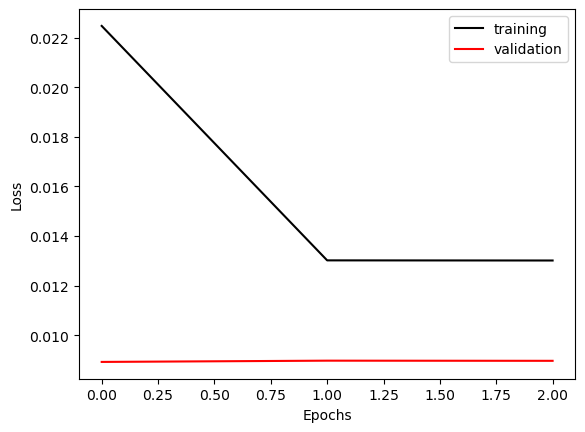

In [115]:
plt.plot(
    range(0, 3), 
    history1_jan.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history1_jan.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [135]:
# To predict, use predict call
predictions1_jan = model1_jan.predict(
    x=test_input_jan,
)

267864/267864 ━━━━━━━━━━━━━━━━━━━━ 197s 729us/step


In [136]:
flat1 = dlr24_jan_final.flatten()
flat2 = predictions1_jan.flatten()

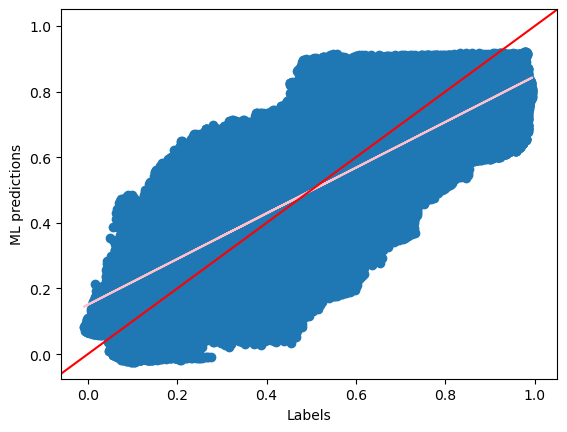

In [137]:
plt.scatter(dlr24_jan_final, predictions1_jan)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [138]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_jan_final - predictions1_jan))

from sklearn.metrics import r2_score
# R2
r2 = r2_score(dlr24_jan_final, predictions1_jan)

print(means); print(r2)

0.010668669
0.6671055555343628


#### Jan Model 2

In [142]:
keras.utils.set_random_seed(1)
model2_jan = Sequential() # instantiate model object
model2_jan.add(keras.Input(shape=(5,), name="input_layer"))
model2_jan.add(Dense(20, kernel_regularizer='l2'))
model2_jan.add(BatchNormalization())
model2_jan.add(Activation('relu'))
model2_jan.add(Dropout(0.5))
model2_jan.add(Dense(1))

In [143]:
model2_jan.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [144]:
history2_jan = model2_jan.fit(
    x=train_input_jan,
    y=dlr23_jan_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 0.0581 - val_loss: 0.0090
Epoch 2/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 0.0139 - val_loss: 0.0090
Epoch 3/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0140 - val_loss: 0.0093


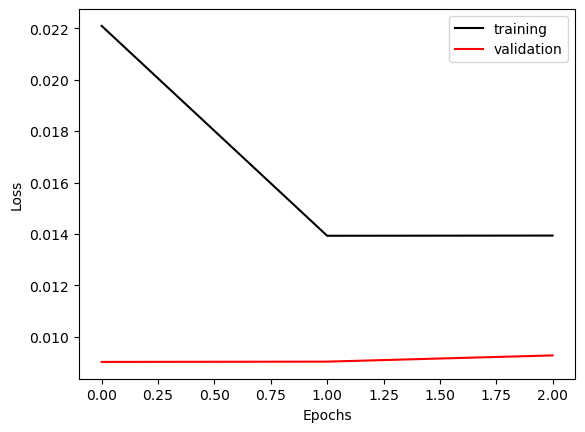

In [145]:
plt.plot(
    range(0, 3), 
    history2_jan.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history2_jan.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [146]:
# To predict, use predict call
predictions2_jan = model2_jan.predict(
    x=test_input_jan,
)

267864/267864 ━━━━━━━━━━━━━━━━━━━━ 201s 751us/step


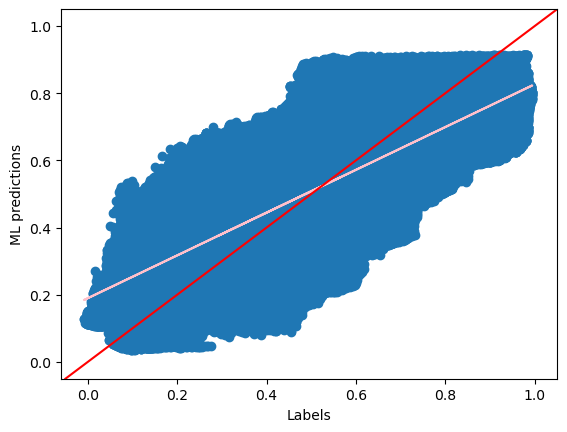

In [147]:
flat2 = predictions2_jan.flatten()

plt.scatter(dlr24_jan_final, predictions2_jan)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [148]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_jan_final - predictions2_jan))

from sklearn.metrics import r2_score
# R2
r2 = r2_score(dlr24_jan_final, predictions2_jan)

print(means); print(r2)

0.011077848
0.654338002204895


#### Jan Model 3

In [149]:
keras.utils.set_random_seed(2)
model3_jan = Sequential() # instantiate model object
model3_jan.add(keras.Input(shape=(5,), name="input_layer"))
model3_jan.add(Dense(20, kernel_regularizer='l2'))
model3_jan.add(BatchNormalization())
model3_jan.add(Activation('relu'))
model3_jan.add(Dropout(0.5))
model3_jan.add(Dense(1))

In [150]:
model3_jan.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [151]:
history3_jan = model3_jan.fit(
    x=train_input_jan,
    y=dlr23_jan_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 0.0544 - val_loss: 0.0094
Epoch 2/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 0.0134 - val_loss: 0.0091
Epoch 3/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0134 - val_loss: 0.0098


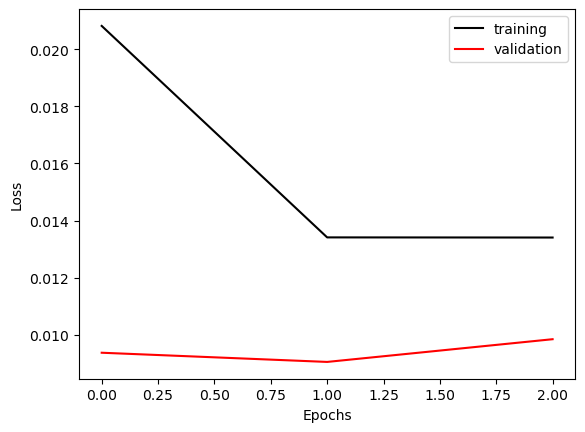

In [152]:
plt.plot(
    range(0, 3), 
    history3_jan.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history3_jan.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [153]:
# To predict, use predict call
predictions3_jan = model3_jan.predict(
    x=test_input_jan,
)

267864/267864 ━━━━━━━━━━━━━━━━━━━━ 197s 735us/step


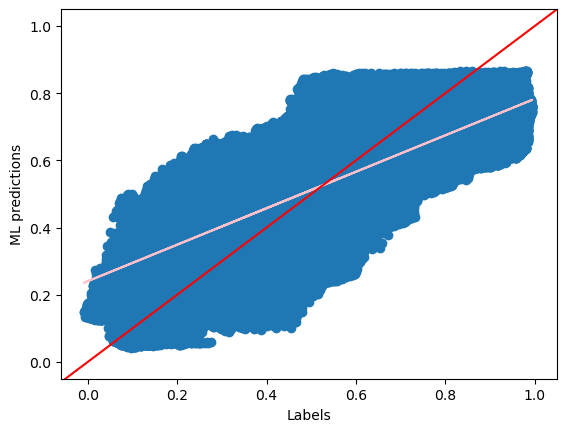

In [154]:
flat2 = predictions3_jan.flatten()

plt.scatter(dlr24_jan_final, predictions3_jan)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [155]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_jan_final - predictions3_jan))

from sklearn.metrics import r2_score
# R2
r2 = r2_score(dlr24_jan_final, predictions3_jan)

print(means); print(r2)

0.012155568
0.6207098960876465


#### Jan Model 4

In [157]:
keras.utils.set_random_seed(3)
model4_jan = Sequential() # instantiate model object
model4_jan.add(keras.Input(shape=(5,), name="input_layer"))
model4_jan.add(Dense(20, kernel_regularizer='l2'))
model4_jan.add(BatchNormalization())
model4_jan.add(Activation('relu'))
model4_jan.add(Dropout(0.5))
model4_jan.add(Dense(1))

In [158]:
model4_jan.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [159]:
history4_jan = model4_jan.fit(
    x=train_input_jan,
    y=dlr23_jan_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.0728 - val_loss: 0.0093
Epoch 2/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0128 - val_loss: 0.0092
Epoch 3/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0128 - val_loss: 0.0092


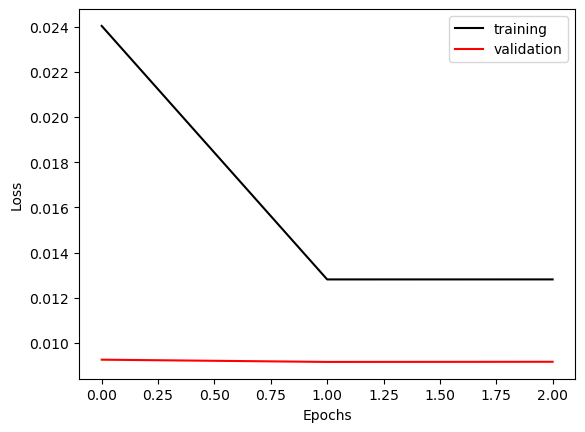

In [160]:
plt.plot(
    range(0, 3), 
    history4_jan.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history4_jan.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [161]:
# To predict, use predict call
predictions4_jan = model4_jan.predict(
    x=test_input_jan,
)

267864/267864 ━━━━━━━━━━━━━━━━━━━━ 185s 689us/step


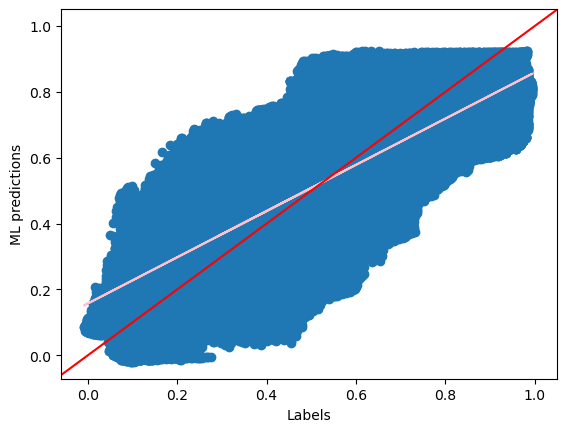

In [162]:
flat2 = predictions4_jan.flatten()

plt.scatter(dlr24_jan_final, predictions4_jan)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [164]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_jan_final - predictions4_jan))

# R2
r2 = r2_score(dlr24_jan_final, predictions4_jan)

print(means); print(r2)

0.010994122
0.6569504737854004


#### Jan Model 5

In [166]:
keras.utils.set_random_seed(4)
model5_jan = Sequential() # instantiate model object
model5_jan.add(keras.Input(shape=(5,), name="input_layer"))
model5_jan.add(Dense(20, kernel_regularizer='l2'))
model5_jan.add(BatchNormalization())
model5_jan.add(Activation('relu'))
model5_jan.add(Dropout(0.5))
model5_jan.add(Dense(1))

In [167]:
model5_jan.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [168]:
history5_jan = model5_jan.fit(
    x=train_input_jan,
    y=dlr23_jan_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.1032 - val_loss: 0.0093
Epoch 2/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 0.0132 - val_loss: 0.0091
Epoch 3/3
26787/26787 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0131 - val_loss: 0.0097


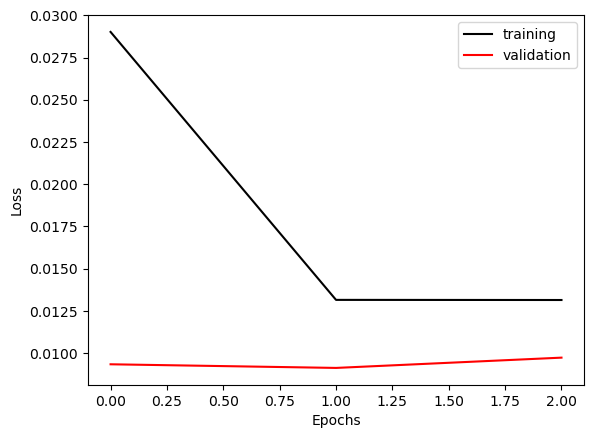

In [169]:
plt.plot(
    range(0, 3), 
    history5_jan.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history5_jan.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [170]:
# To predict, use predict call
predictions5_jan = model5_jan.predict(
    x=test_input_jan,
)

267864/267864 ━━━━━━━━━━━━━━━━━━━━ 180s 670us/step


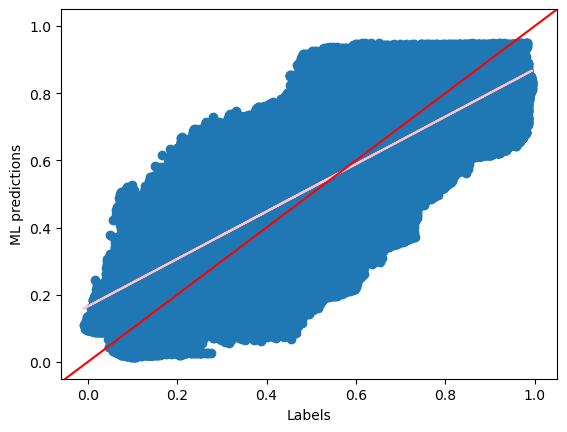

In [171]:
flat2 = predictions5_jan.flatten()

plt.scatter(dlr24_jan_final, predictions5_jan)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [172]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_jan_final - predictions5_jan))

# R2
r2 = r2_score(dlr24_jan_final, predictions5_jan)

print(means); print(r2)

0.011337131
0.6462475657463074


### Model Evaluation for February Only

#### Feb Model 1

In [188]:
#keras.utils.set_random_seed(4)
model1_feb = Sequential() # instantiate model object
model1_feb.add(keras.Input(shape=(5,), name="input_layer"))
model1_feb.add(Dense(20, kernel_regularizer='l2'))
model1_feb.add(BatchNormalization())
model1_feb.add(Activation('relu'))
model1_feb.add(Dropout(0.5))
model1_feb.add(Dense(1))

In [189]:
model1_feb.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [190]:
history1_feb = model1_feb.fit(
    x=train_input_feb,
    y=dlr23_feb_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 68s 2ms/step - loss: 0.0769 - val_loss: 0.0167
Epoch 2/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.0158 - val_loss: 0.0167
Epoch 3/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - loss: 0.0158 - val_loss: 0.0165


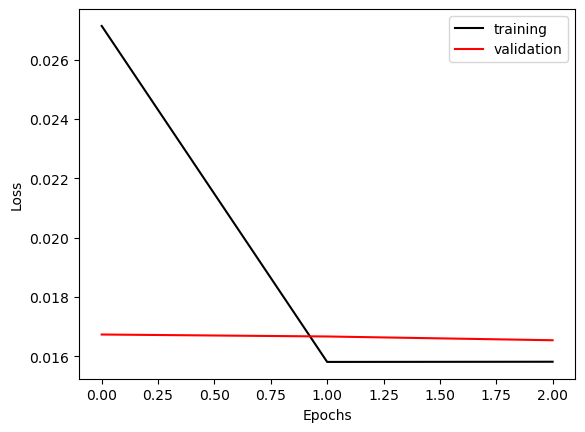

In [191]:
plt.plot(
    range(0, 3), 
    history1_feb.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history1_feb.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [192]:
# To predict, use predict call
predictions1_feb = model1_feb.predict(
    x=test_input_feb,
)

241941/241941 ━━━━━━━━━━━━━━━━━━━━ 183s 756us/step


/glade/derecho/scratch/vgorden/tmp/ipykernel_34789/1945183767.py:12: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(flat3, flat4, 1)


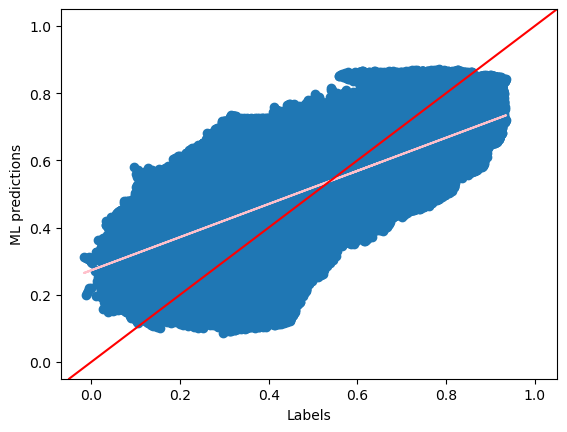

In [193]:
flat3 = dlr24_feb_final.flatten()
flat4 = predictions1_feb.flatten()

plt.scatter(dlr24_feb_final, predictions1_feb)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat3, flat4, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat3)
plt.plot(flat3, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [194]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_feb_final - predictions1_feb))

# R2
r2 = r2_score(dlr24_feb_final, predictions1_feb)

print(means); print(r2)

0.013434186
0.49700331687927246


#### Feb Model 2

In [195]:
keras.utils.set_random_seed(5)
model2_feb = Sequential() # instantiate model object
model2_feb.add(keras.Input(shape=(5,), name="input_layer"))
model2_feb.add(Dense(20, kernel_regularizer='l2'))
model2_feb.add(BatchNormalization())
model2_feb.add(Activation('relu'))
model2_feb.add(Dropout(0.5))
model2_feb.add(Dense(1))

In [196]:
model2_feb.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [197]:
history2_feb = model2_feb.fit(
    x=train_input_feb,
    y=dlr23_feb_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 0.1167 - val_loss: 0.0158
Epoch 2/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0154 - val_loss: 0.0161
Epoch 3/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0154 - val_loss: 0.0163


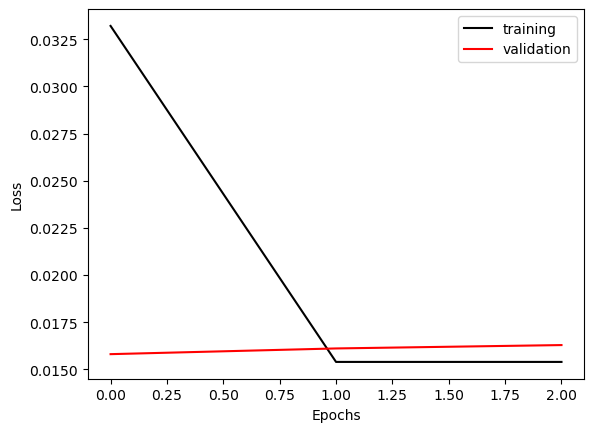

In [198]:
plt.plot(
    range(0, 3), 
    history2_feb.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history2_feb.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [199]:
# To predict, use predict call
predictions2_feb = model2_feb.predict(
    x=test_input_feb,
)

241941/241941 ━━━━━━━━━━━━━━━━━━━━ 172s 711us/step


/glade/derecho/scratch/vgorden/tmp/ipykernel_34789/3525180021.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(flat3, flat4, 1)


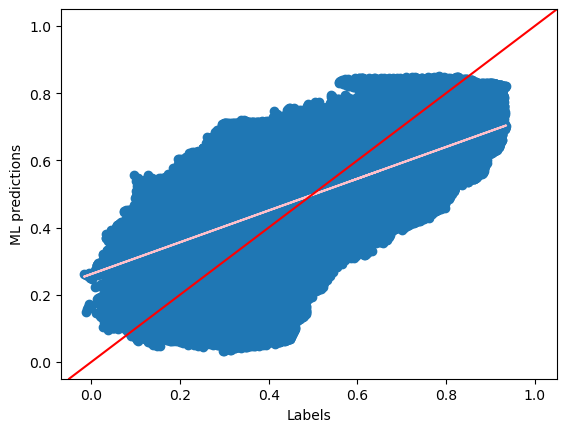

In [200]:
flat4 = predictions2_feb.flatten()

plt.scatter(dlr24_feb_final, predictions2_feb)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat3, flat4, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat3)
plt.plot(flat3, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [201]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_feb_final - predictions2_feb))

# R2
r2 = r2_score(dlr24_feb_final, predictions2_feb)

print(means); print(r2)

0.013381846
0.49896299839019775


#### Feb Model 3

In [204]:
keras.utils.set_random_seed(13)
model3_feb = Sequential() # instantiate model object
model3_feb.add(keras.Input(shape=(5,), name="input_layer"))
model3_feb.add(Dense(20, kernel_regularizer='l2'))
model3_feb.add(BatchNormalization())
model3_feb.add(Activation('relu'))
model3_feb.add(Dropout(0.5))
model3_feb.add(Dense(1))

In [205]:
model3_feb.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [206]:
history3_feb = model3_feb.fit(
    x=train_input_feb,
    y=dlr23_feb_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.0406 - val_loss: 0.0165
Epoch 2/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0154 - val_loss: 0.0166
Epoch 3/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0154 - val_loss: 0.0168


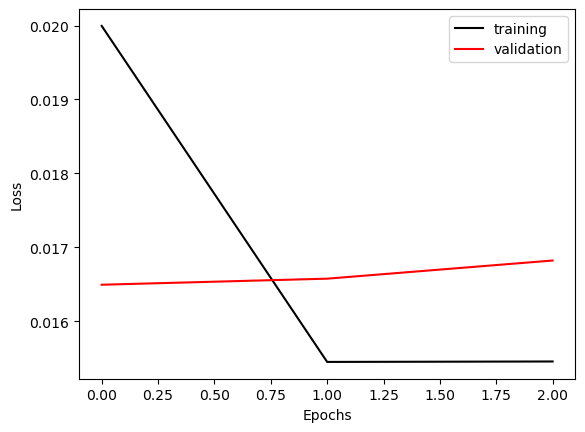

In [207]:
plt.plot(
    range(0, 3), 
    history3_feb.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history3_feb.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [208]:
# To predict, use predict call
predictions3_feb = model3_feb.predict(
    x=test_input_feb,
)

241941/241941 ━━━━━━━━━━━━━━━━━━━━ 173s 715us/step


/glade/derecho/scratch/vgorden/tmp/ipykernel_34789/2168896750.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(flat3, flat4, 1)


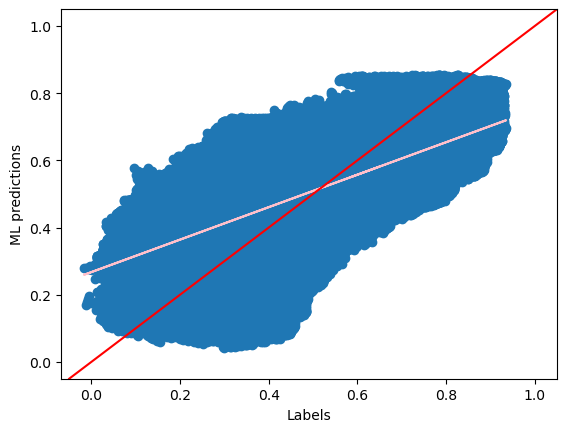

In [209]:
flat4 = predictions3_feb.flatten()

plt.scatter(dlr24_feb_final, predictions3_feb)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat3, flat4, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat3)
plt.plot(flat3, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [210]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_feb_final - predictions3_feb))

# R2
r2 = r2_score(dlr24_feb_final, predictions3_feb)

print(means); print(r2)

0.013643363
0.48917144536972046


#### Feb Model 4

In [212]:
keras.utils.set_random_seed(22)
model4_feb = Sequential() # instantiate model object
model4_feb.add(keras.Input(shape=(5,), name="input_layer"))
model4_feb.add(Dense(20, kernel_regularizer='l2'))
model4_feb.add(BatchNormalization())
model4_feb.add(Activation('relu'))
model4_feb.add(Dropout(0.5))
model4_feb.add(Dense(1))

In [213]:
model4_feb.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [214]:
history4_feb = model4_feb.fit(
    x=train_input_feb,
    y=dlr23_feb_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 0.0699 - val_loss: 0.0162
Epoch 2/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0154 - val_loss: 0.0176
Epoch 3/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0155 - val_loss: 0.0154


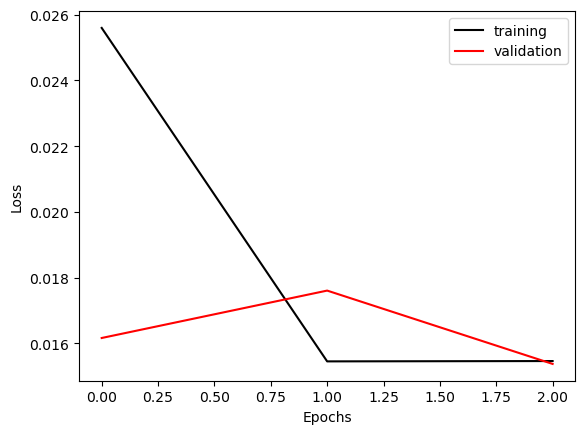

In [215]:
plt.plot(
    range(0, 3), 
    history4_feb.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history4_feb.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [216]:
# To predict, use predict call
predictions4_feb = model4_feb.predict(
    x=test_input_feb,
)

241941/241941 ━━━━━━━━━━━━━━━━━━━━ 168s 694us/step


/glade/derecho/scratch/vgorden/tmp/ipykernel_34789/4174799848.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(flat3, flat4, 1)


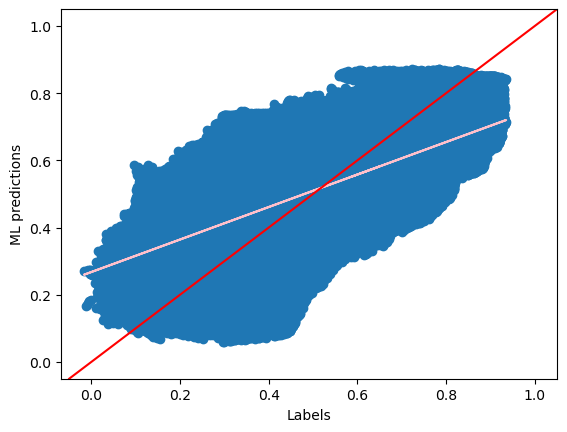

In [217]:
flat4 = predictions4_feb.flatten()

plt.scatter(dlr24_feb_final, predictions4_feb)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat3, flat4, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat3)
plt.plot(flat3, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [218]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_feb_final - predictions4_feb))

# R2
r2 = r2_score(dlr24_feb_final, predictions4_feb)

print(means); print(r2)

0.012556732
0.5298565626144409


#### Feb Model 5

In [220]:
keras.utils.set_random_seed(30)
model5_feb = Sequential() # instantiate model object
model5_feb.add(keras.Input(shape=(5,), name="input_layer"))
model5_feb.add(Dense(20, kernel_regularizer='l2'))
model5_feb.add(BatchNormalization())
model5_feb.add(Activation('relu'))
model5_feb.add(Dropout(0.5))
model5_feb.add(Dense(1))

In [221]:
model5_feb.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [222]:
history5_feb = model5_feb.fit(
    x=train_input_feb,
    y=dlr23_feb_final,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - loss: 0.0624 - val_loss: 0.0167
Epoch 2/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0155 - val_loss: 0.0170
Epoch 3/3
24195/24195 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0154 - val_loss: 0.0176


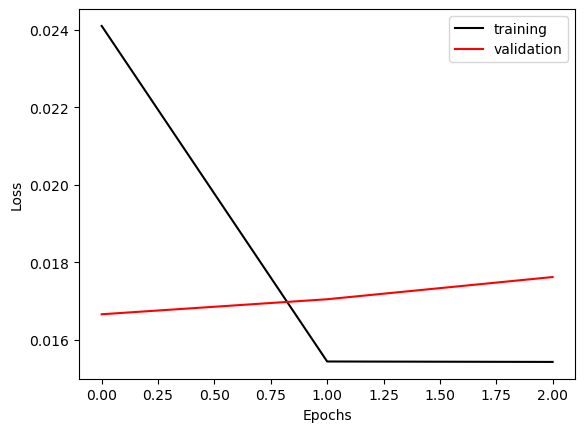

In [223]:
plt.plot(
    range(0, 3), 
    history5_feb.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history5_feb.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [224]:
# To predict, use predict call
predictions5_feb = model5_feb.predict(
    x=test_input_feb,
)

241941/241941 ━━━━━━━━━━━━━━━━━━━━ 168s 696us/step


/glade/derecho/scratch/vgorden/tmp/ipykernel_34789/2871347263.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(flat3, flat4, 1)


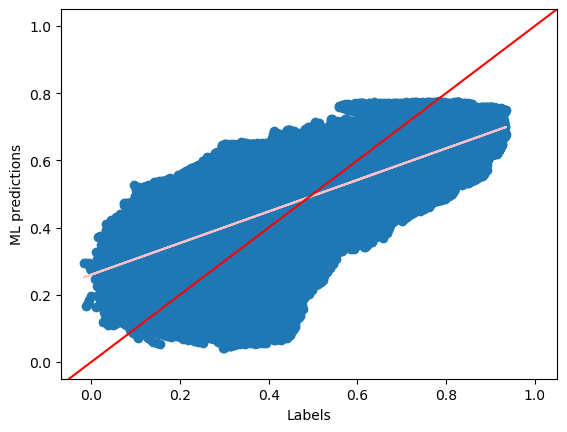

In [225]:
flat4 = predictions5_feb.flatten()

plt.scatter(dlr24_feb_final, predictions5_feb)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat3, flat4, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat3)
plt.plot(flat3, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [226]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(dlr24_feb_final - predictions5_feb))

# R2
r2 = r2_score(dlr24_feb_final, predictions5_feb)

print(means); print(r2)

0.015087172
0.43511295318603516


### Model Evaluation for All Data

In [2]:
# Import numpy datasets used in main notebook
input_train = np.load('new_input_train.npy')
output_train = np.load('output_train_rescaled.npy')

input_test = np.load('new_input_test.npy')
output_test = np.load('output_test_rescaled.npy')

In [5]:
keras.utils.set_random_seed(8)
model = Sequential() # instantiate model object
model.add(keras.Input(shape=(5,), name="input_layer"))
model.add(Dense(20, kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [6]:
model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [9]:
history = model.fit(
    x=input_train,
    y=output_train,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - loss: 0.0517 - val_loss: 0.0111
Epoch 2/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 195s 3ms/step - loss: 0.0128 - val_loss: 0.0117
Epoch 3/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 169s 3ms/step - loss: 0.0128 - val_loss: 0.0117


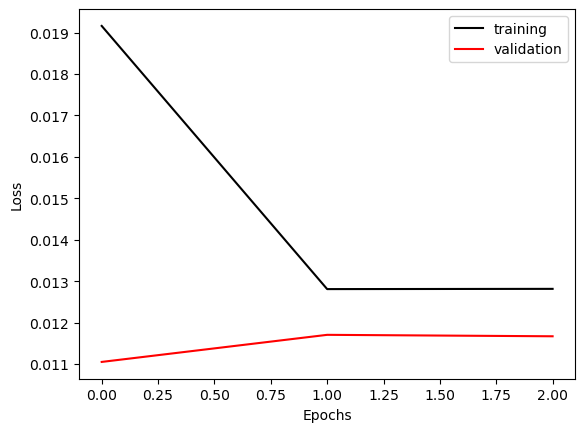

In [12]:
plt.plot(
    range(0, 3), 
    history.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
# To predict, use predict call
predictions = model.predict(
    x=input_test,
)

509805/509805 ━━━━━━━━━━━━━━━━━━━━ 358s 699us/step


In [14]:
flat1 = output_test.flatten()
flat2 = predictions.flatten()

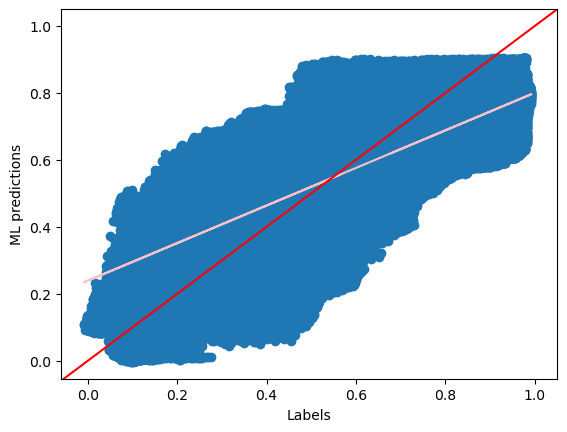

In [15]:
plt.scatter(output_test, predictions)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [18]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(output_test - predictions))

from sklearn.metrics import r2_score
# R2
r2 = r2_score(output_test, predictions)

print(means); print(r2)

0.011257165
0.620658278465271


In [19]:
keras.utils.set_random_seed(90)
model2 = Sequential() # instantiate model object
model2.add(keras.Input(shape=(5,), name="input_layer"))
model2.add(Dense(20, kernel_regularizer='l2'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

In [20]:
model2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [21]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 40 (160.00 B)

In [24]:
history2 = model2.fit(
    x=input_train,
    y=output_train,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - loss: 0.0731 - val_loss: 0.0112
Epoch 2/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 144s 2ms/step - loss: 0.0133 - val_loss: 0.0112
Epoch 3/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 138s 2ms/step - loss: 0.0133 - val_loss: 0.0115


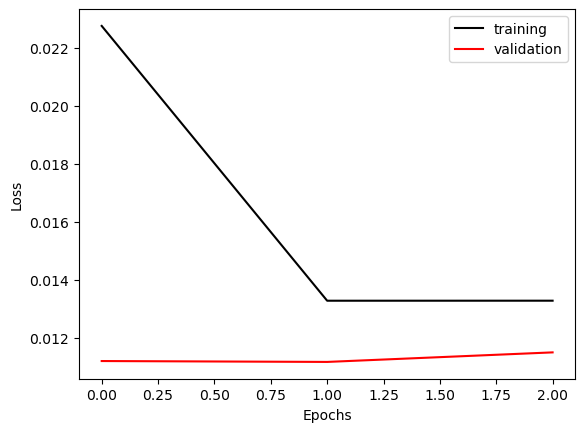

In [25]:
plt.plot(
    range(0, 3), 
    history2.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history2.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# To predict, use predict call
predictions2 = model2.predict(
    x=input_test,
)

509805/509805 ━━━━━━━━━━━━━━━━━━━━ 357s 700us/step


In [27]:
flat1 = output_test.flatten()
flat2 = predictions2.flatten()

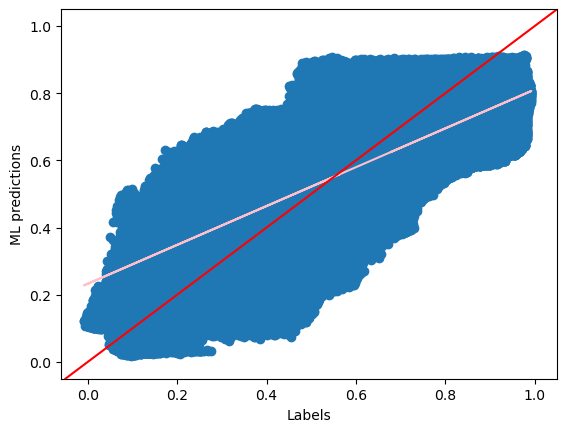

In [28]:
plt.scatter(output_test, predictions2)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [29]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(output_test - predictions2))

# R2
r2 = r2_score(output_test, predictions2)

print(means); print(r2)

0.011101994
0.6258872747421265


In [30]:
keras.utils.set_random_seed(126)
model3 = Sequential() # instantiate model object
model3.add(keras.Input(shape=(5,), name="input_layer"))
model3.add(Dense(20, kernel_regularizer='l2'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1))

In [31]:
model3.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [32]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 40 (160.00 B)

In [33]:
history3 = model3.fit(
    x=input_train,
    y=output_train,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 96s 2ms/step - loss: 0.0488 - val_loss: 0.0114
Epoch 2/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - loss: 0.0134 - val_loss: 0.0120
Epoch 3/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - loss: 0.0134 - val_loss: 0.0126


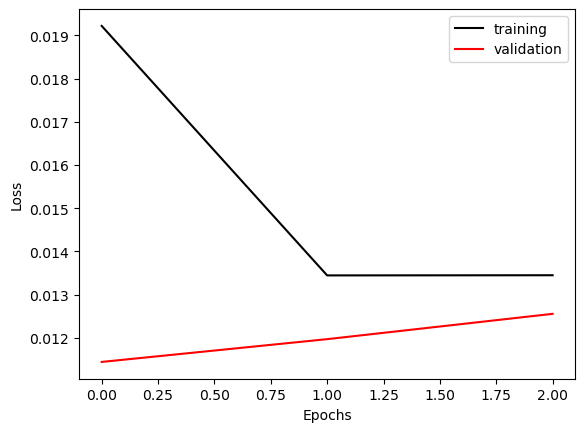

In [36]:
plt.plot(
    range(0, 3), 
    history3.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history3.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# To predict, use predict call
predictions3 = model3.predict(
    x=input_test,
)

509805/509805 ━━━━━━━━━━━━━━━━━━━━ 379s 744us/step


In [38]:
flat1 = output_test.flatten()
flat2 = predictions3.flatten()

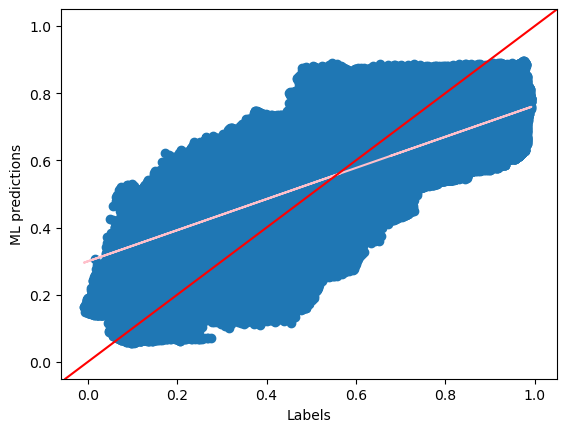

In [39]:
plt.scatter(output_test, predictions3)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [40]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(output_test - predictions3))

# R2
r2 = r2_score(output_test, predictions3)

print(means); print(r2)

0.012828083
0.5677218437194824


In [41]:
keras.utils.set_random_seed(200)
model4 = Sequential() # instantiate model object
model4.add(keras.Input(shape=(5,), name="input_layer"))
model4.add(Dense(20, kernel_regularizer='l2'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1))

In [44]:
model4.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001),
    loss='mse'
)

In [45]:
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 20)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 40 (160.00 B)

In [46]:
history4 = model4.fit(
    x=input_train,
    y=output_train,
    batch_size=256,
    epochs=EPOCHS,
    verbose='auto',
    validation_split=0.2,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
)

Epoch 1/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 105s 2ms/step - loss: 0.0521 - val_loss: 0.0112
Epoch 2/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - loss: 0.0128 - val_loss: 0.0110
Epoch 3/3
50981/50981 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - loss: 0.0128 - val_loss: 0.0112


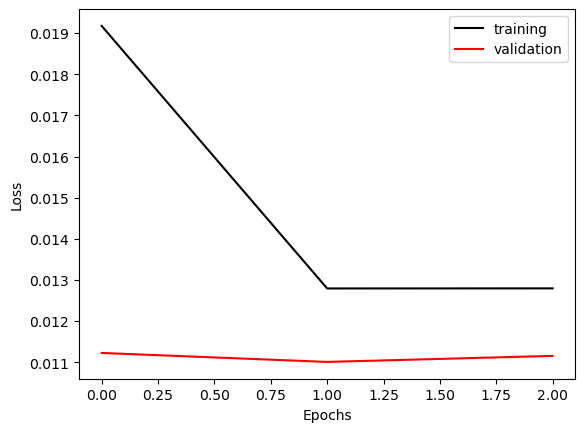

In [47]:
plt.plot(
    range(0, 3), 
    history4.history['loss'], 
    c='k', 
    label='training'
)
plt.plot(range(0, 3), 
         history4.history['val_loss'], 
         c='r', 
         label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
# To predict, use predict call
predictions4 = model4.predict(
    x=input_test,
)

509805/509805 ━━━━━━━━━━━━━━━━━━━━ 396s 776us/step


In [49]:
flat1 = output_test.flatten()
flat2 = predictions4.flatten()

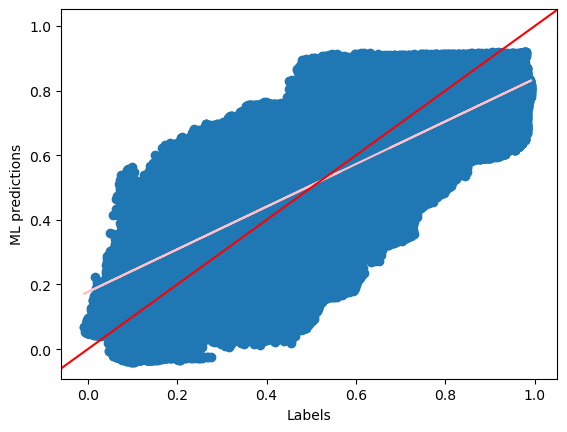

In [50]:
plt.scatter(output_test, predictions4)
#plt.ylim([0,1.2])
#plt.xlim([0,1.2])
plt.xlabel('Labels')
plt.ylabel('ML predictions')

# Line of best fit

coefficients = np.polyfit(flat1, flat2, 1)
polynomial = np.poly1d(coefficients)
y_predicted = polynomial(flat1)
plt.plot(flat1, y_predicted, color='pink')

plt.axline((0, 0), (1, 1), color='r')

plt.show()

In [51]:
# MSE
# np.mean(square(y_true - y_pred))
means = np.mean(np.square(output_test - predictions4))

# R2
r2 = r2_score(output_test, predictions4)

print(means); print(r2)

0.010639392
0.6414759159088135
